In [9]:
import os
import json
import numpy as np
from PIL import Image, ImageDraw

masks_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\Masks"
output_folder = os.path.join(masks_folder, "Converted")

os.makedirs(output_folder, exist_ok=True)

for file in os.listdir(masks_folder):
    if file.endswith(".json"):
        json_path = os.path.join(masks_folder, file)
        with open(json_path, "r") as f:
            data = json.load(f)

        img_w, img_h = data["imageWidth"], data["imageHeight"]
        mask = Image.new("L", (img_w, img_h), 0)
        draw = ImageDraw.Draw(mask)

        for shape in data["shapes"]:
            points = [tuple(p) for p in shape["points"]]
            draw.polygon(points, outline=1, fill=1)

        out_name = file.replace(".json", ".png")
        mask.save(os.path.join(output_folder, out_name))

        print(f"Converted: {file} -> {out_name}")


Converted: 000000000139.json -> 000000000139.png
Converted: 000000000285.json -> 000000000285.png
Converted: 000000001000.json -> 000000001000.png
Converted: 000000001296.json -> 000000001296.png
Converted: 000000001353.json -> 000000001353.png
Converted: 000000001425.json -> 000000001425.png
Converted: 000000001490.json -> 000000001490.png
Converted: 000000025560.json -> 000000025560.png
Converted: 000000025603.json -> 000000025603.png
Converted: 000000025986.json -> 000000025986.png
Converted: 000000026690.json -> 000000026690.png


Found 11 images with masks.


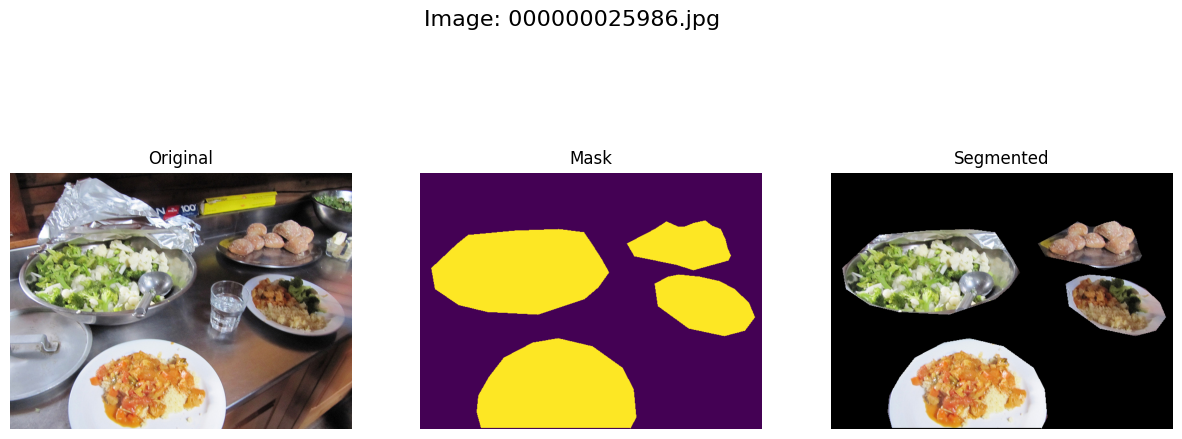

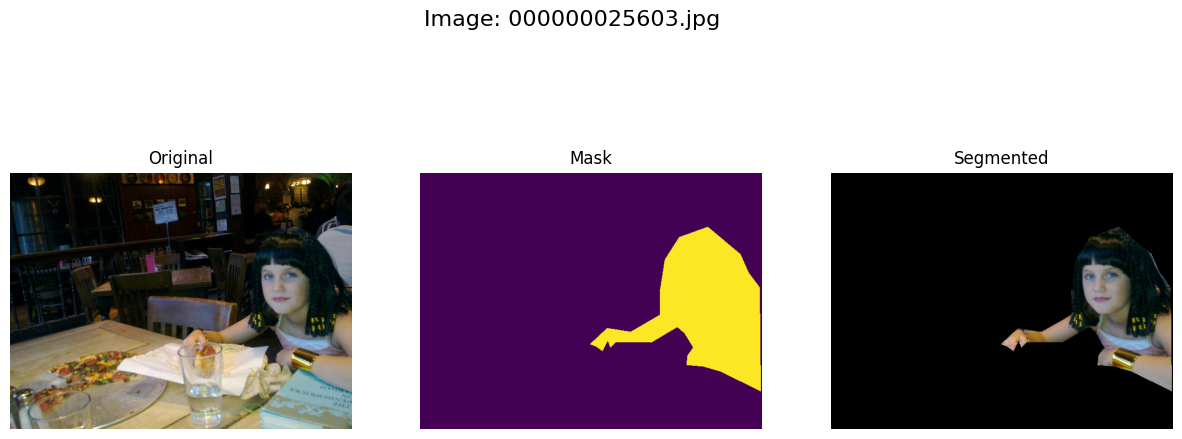

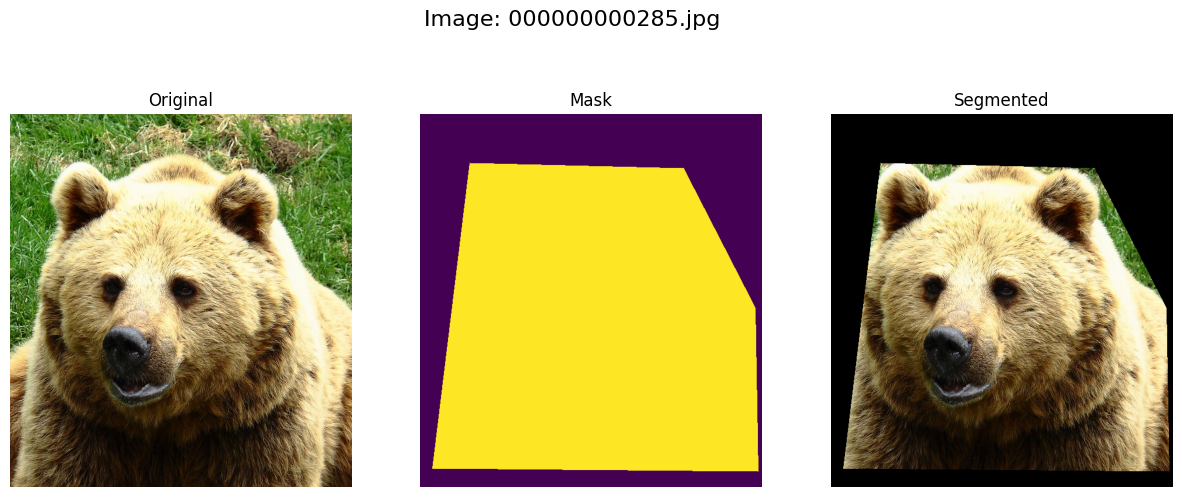

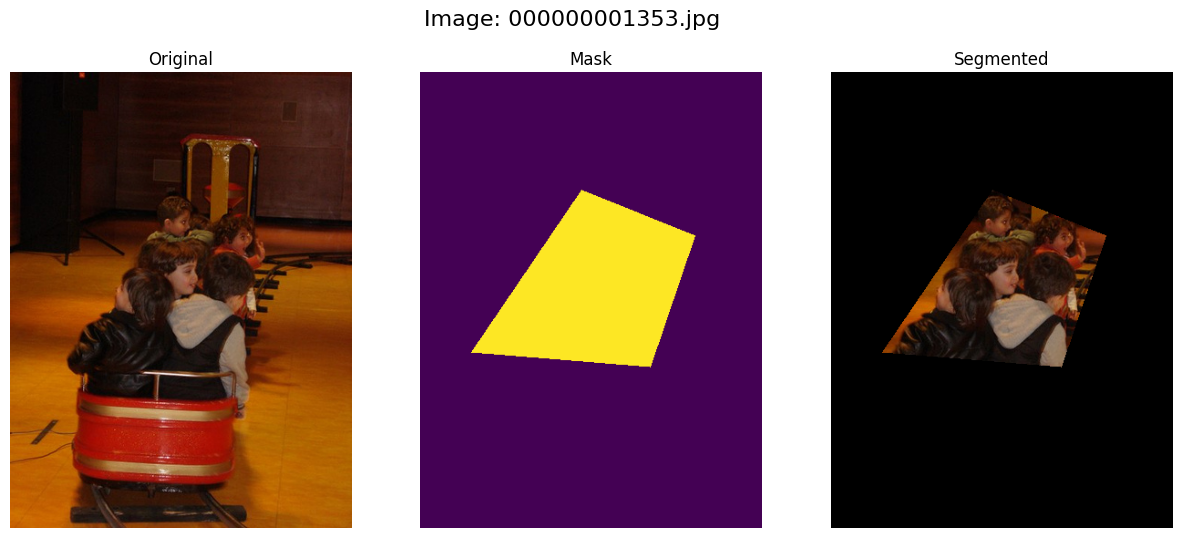

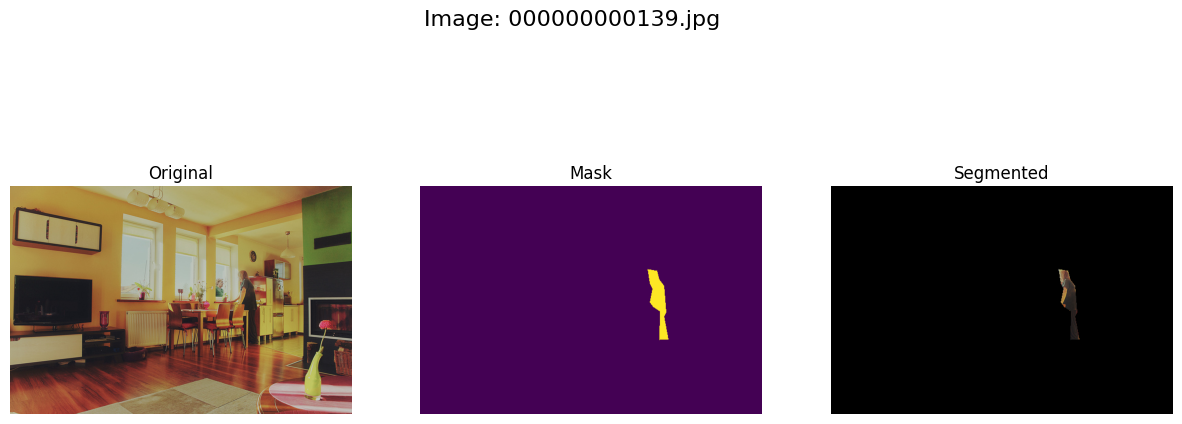

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

%matplotlib inline

images_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\val2017\val2017"
masks_folder  = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\Masks\Converted"  

all_images = sorted(os.listdir(images_folder))
all_masks = sorted(os.listdir(masks_folder))

images_with_masks = []

for img_name in all_images:
    base_name = os.path.splitext(img_name)[0]
    matched_mask = None
    for mask_name in all_masks:
        if base_name in mask_name:
            matched_mask = mask_name
            break
    if matched_mask:
        images_with_masks.append((img_name, matched_mask))

print(f"Found {len(images_with_masks)} images with masks.")

random.shuffle(images_with_masks)
images_to_display = images_with_masks[:5]

for img_name, mask_name in images_to_display:
    img_path  = os.path.join(images_folder, img_name)
    mask_path = os.path.join(masks_folder, mask_name)

    try:
        image = np.array(Image.open(img_path).convert("RGB"))
        mask  = np.array(Image.open(mask_path))

        segmented = np.zeros_like(image)
        segmented[mask > 0] = image[mask > 0]

        fig, ax = plt.subplots(1, 3, figsize=(15, 6))
        fig.suptitle(f"Image: {img_name}", fontsize=16)

        ax[0].imshow(image)
        ax[0].set_title("Original")
        ax[0].axis('off')

        ax[1].imshow(mask)
        ax[1].set_title("Mask")
        ax[1].axis('off')

        ax[2].imshow(segmented)
        ax[2].set_title("Segmented")
        ax[2].axis('off')

        plt.show()

    except Exception as e:
        print(f"Error loading {img_name}: {e}")
        continue


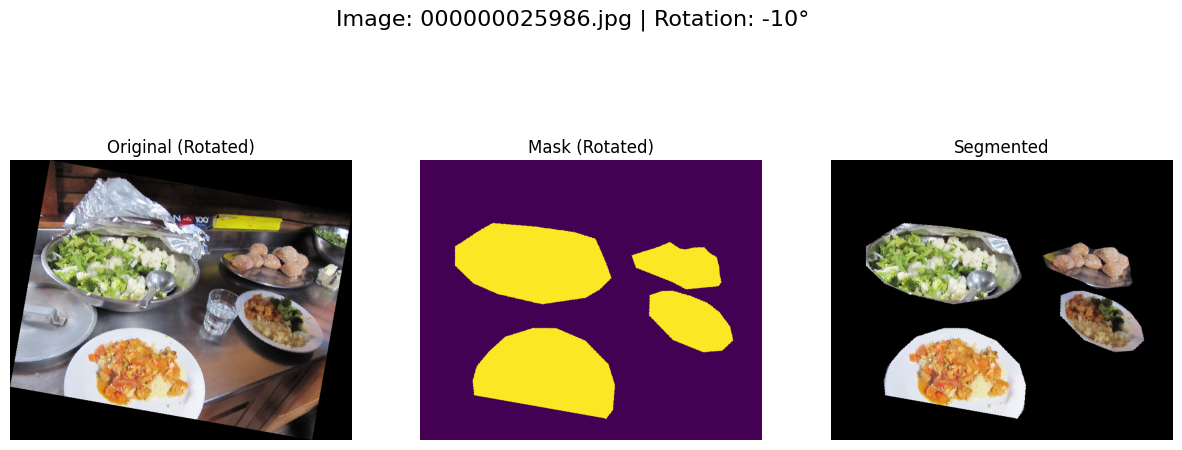

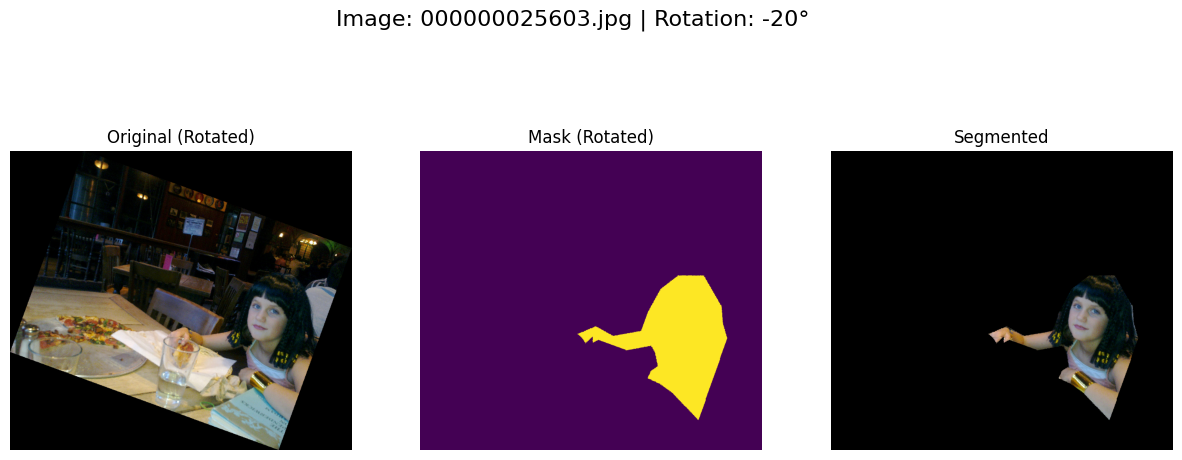

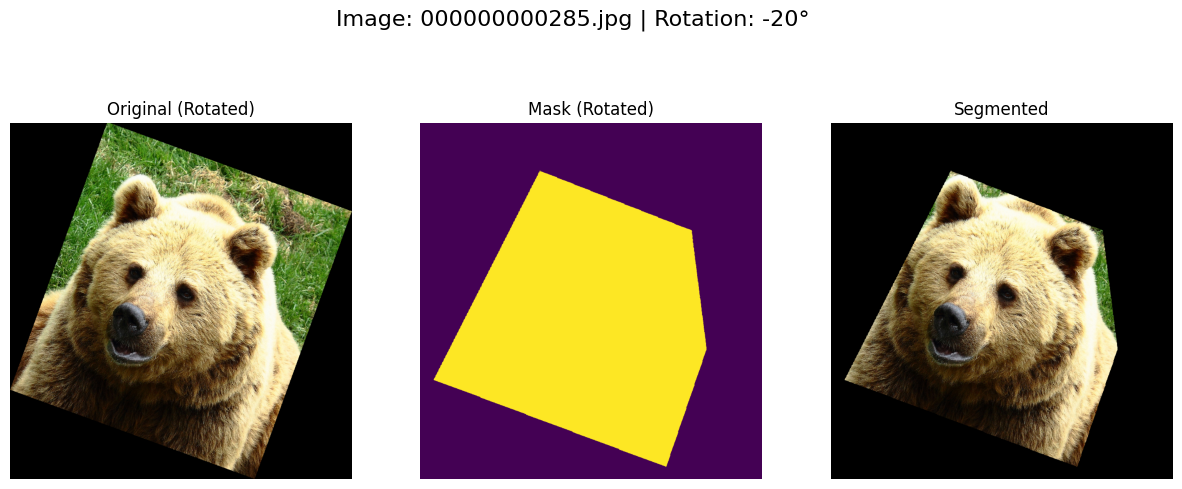

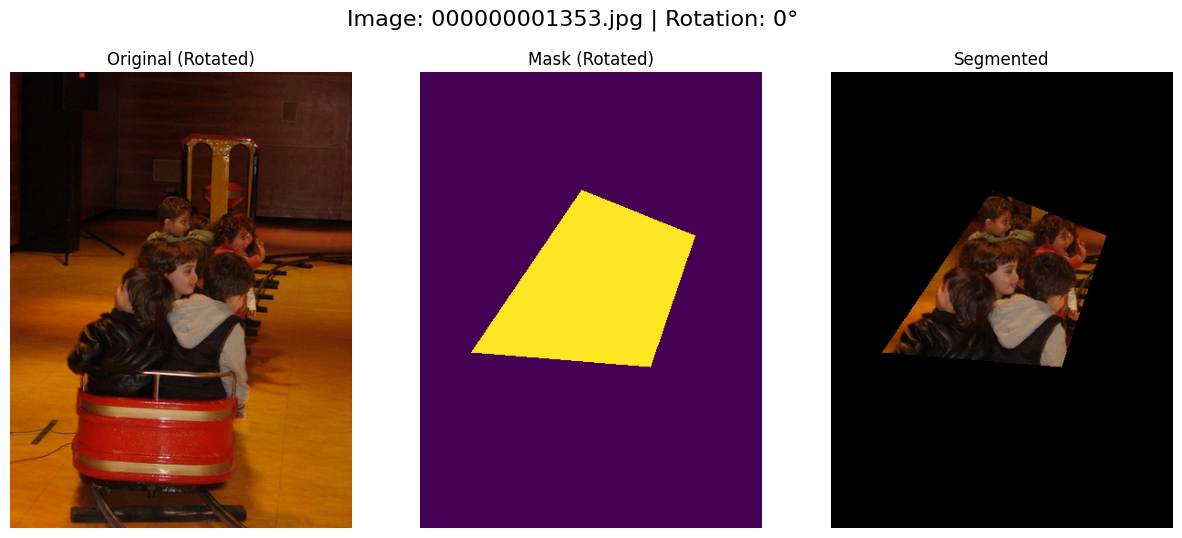

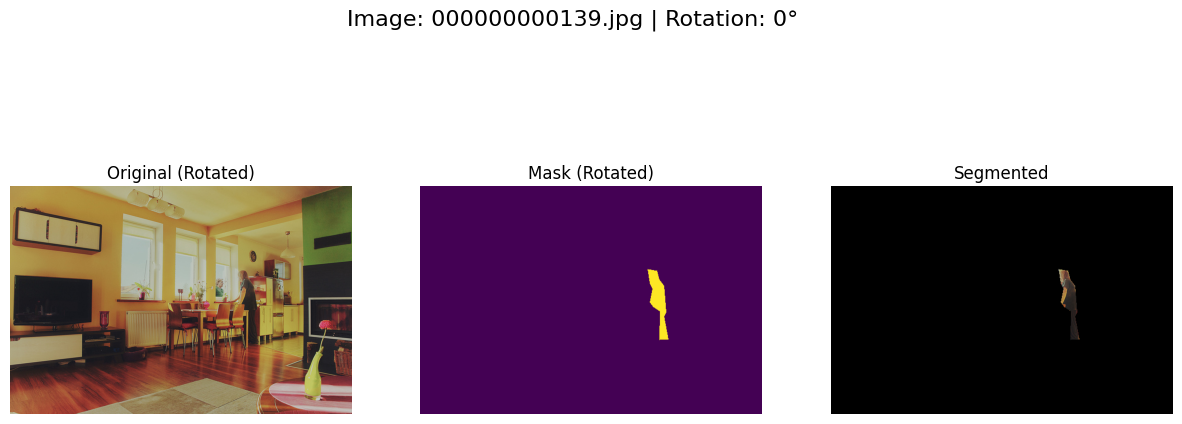

In [11]:
from PIL import ImageOps

for img_name, mask_name in images_to_display:
    img_path  = os.path.join(images_folder, img_name)
    mask_path = os.path.join(masks_folder, mask_name)

    try:
        image = Image.open(img_path).convert("RGB")
        mask  = Image.open(mask_path)

        angle = random.choice([-20, -10, 0, 10, 20])
        image_rot = image.rotate(angle, expand=True)
        mask_rot  = mask.rotate(angle, expand=True)

        image_np = np.array(image_rot)
        mask_np  = np.array(mask_rot)

        segmented = np.zeros_like(image_np)
        segmented[mask_np > 0] = image_np[mask_np > 0]

        fig, ax = plt.subplots(1, 3, figsize=(15, 6))
        fig.suptitle(f"Image: {img_name} | Rotation: {angle}°", fontsize=16)

        ax[0].imshow(image_np)
        ax[0].set_title("Original (Rotated)")
        ax[0].axis('off')

        ax[1].imshow(mask_np)
        ax[1].set_title("Mask (Rotated)")
        ax[1].axis('off')

        ax[2].imshow(segmented)
        ax[2].set_title("Segmented")
        ax[2].axis('off')

        plt.show()

    except Exception as e:
        print(f"Error loading {img_name}: {e}")
        continue


In [13]:
!pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 2.4 MB/s eta 0:00:17
   - -------------------------------------- 1.0/39.0 MB 1.6 MB/s eta 0:00:25
   - -------------------------------------- 1.3/39.0 MB 1.7 MB/s eta 0:00:23
   - -------------------------------------- 1.8/39.0 MB 1.7 MB/s eta 0:00:22
   -- ------------------------------------- 2.4/39.0 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.6/39.0 MB 1.8 MB/s eta 0:00:20
   --- ------------------------------------ 3.1/39.0 MB 1.9 MB/s eta 0:00:19
   --- ------------------------------------ 3.7/39.0 MB 1.9 MB/s eta 0:00:19
   ---- ----------------------------------- 3.9/39.0 MB 2.0 MB/s eta 0:00:18
   ---- ----------------------------------- 4.5/39.0 MB 1.9 MB/s eta 0:00:19
   ---- --

  You can safely remove it manually.
  You can safely remove it manually.


Found 11 images with masks.
000000001000.jpg - Segmented Area: 29.40%


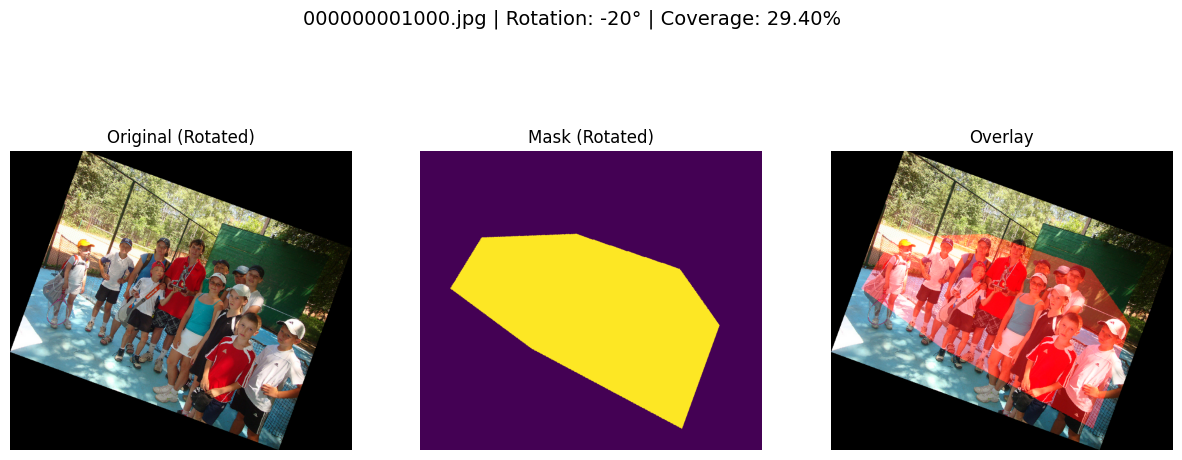

000000025603.jpg - Segmented Area: 10.61%


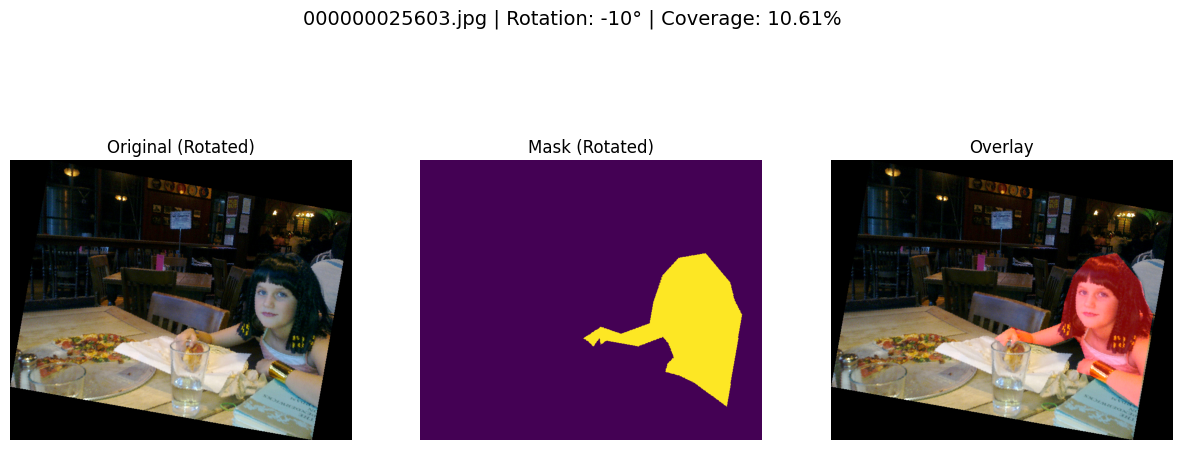

000000001296.jpg - Segmented Area: 39.50%


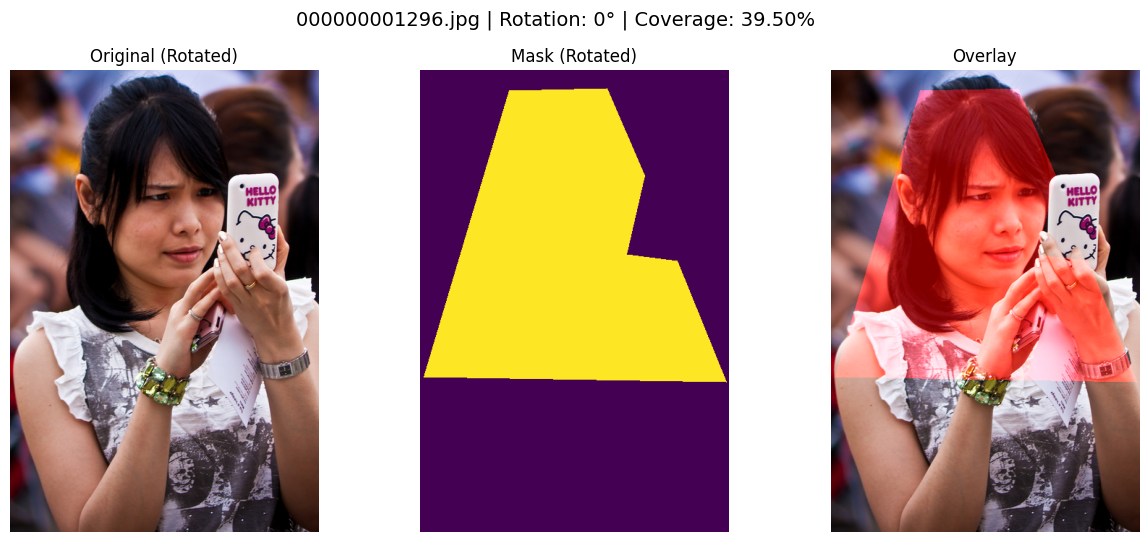

000000025560.jpg - Segmented Area: 6.42%


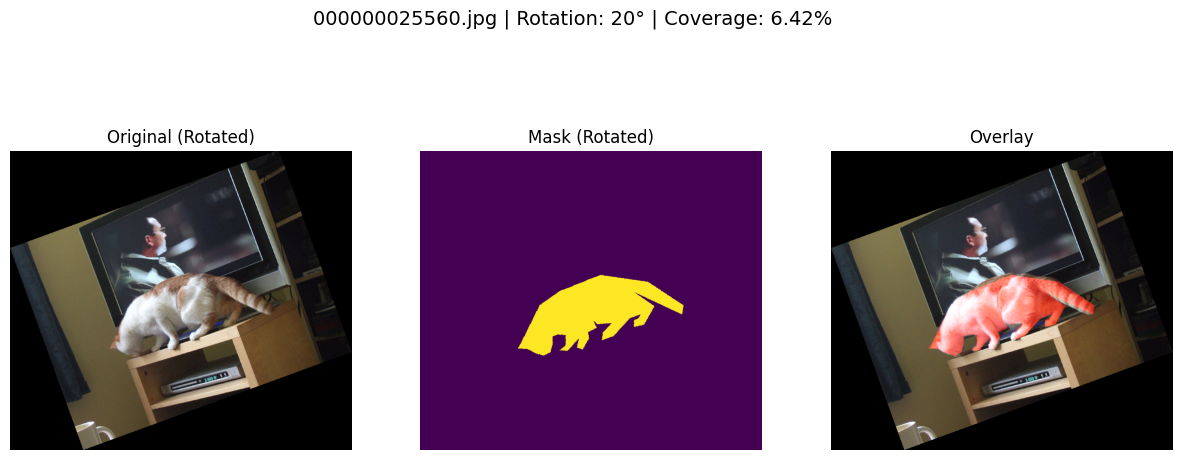

000000025986.jpg - Segmented Area: 26.02%


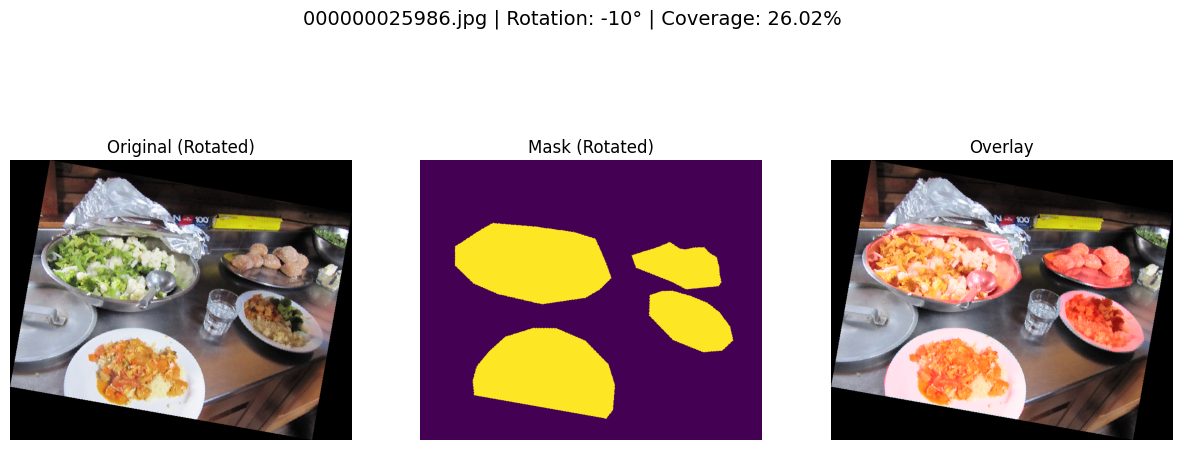

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random
import cv2

%matplotlib inline

images_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\val2017\val2017"
masks_folder  = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\Masks\Converted"
segmented_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\Segmented"
os.makedirs(segmented_folder, exist_ok=True)

all_images = sorted(os.listdir(images_folder))
all_masks = sorted(os.listdir(masks_folder))
images_with_masks = []

for img_name in all_images:
    base_name = os.path.splitext(img_name)[0]
    matched_mask = None
    for mask_name in all_masks:
        if base_name in mask_name:
            matched_mask = mask_name
            break
    if matched_mask:
        images_with_masks.append((img_name, matched_mask))

print(f"Found {len(images_with_masks)} images with masks.")

# Pick 5 random images to display
random.shuffle(images_with_masks)
images_to_display = images_with_masks[:5]

for img_name, mask_name in images_to_display:
    img_path = os.path.join(images_folder, img_name)
    mask_path = os.path.join(masks_folder, mask_name)

    try:
        image = Image.open(img_path).convert("RGB")
        mask  = Image.open(mask_path)

        # Random rotation
        angle = random.choice([-20, -10, 0, 10, 20])
        image_rot = image.rotate(angle, expand=True)
        mask_rot  = mask.rotate(angle, expand=True)

        image_np = np.array(image_rot)
        mask_np  = np.array(mask_rot)

        # Segmentation
        segmented = np.zeros_like(image_np)
        segmented[mask_np > 0] = image_np[mask_np > 0]

        # Mask overlay
        colored_mask = np.zeros_like(image_np)
        colored_mask[mask_np>0] = [255, 0, 0]  # red
        alpha = 0.5
        overlay = cv2.addWeighted(image_np, 1, colored_mask, alpha, 0)

        # Segmented area coverage
        coverage = np.sum(mask_np>0) / (mask_np.shape[0]*mask_np.shape[1]) * 100
        print(f"{img_name} - Segmented Area: {coverage:.2f}%")

        # Save segmented image
        save_path = os.path.join(segmented_folder, img_name)
        Image.fromarray(segmented).save(save_path)

        # Display
        fig, ax = plt.subplots(1, 3, figsize=(15,6))
        fig.suptitle(f"{img_name} | Rotation: {angle}° | Coverage: {coverage:.2f}%", fontsize=14)

        ax[0].imshow(image_np)
        ax[0].set_title("Original (Rotated)")
        ax[0].axis('off')

        ax[1].imshow(mask_np)
        ax[1].set_title("Mask (Rotated)")
        ax[1].axis('off')

        ax[2].imshow(overlay)
        ax[2].set_title("Overlay")
        ax[2].axis('off')

        plt.show()

    except Exception as e:
        print(f"Error with {img_name}: {e}")
        continue
